In [34]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

path='D://4th Semester//Data Mining2//DMC//PreProcessing//'
df = pd.read_csv(path+'daily_avg.csv')
i=31
while i>0:
    df.drop(df.index[[91+i]],inplace=True) #delete January
    i-=1
    

df.columns = ['ds','y']
df.tail()


,ds,y
87,2017-12-27,0.177526
88,2017-12-28,0.191963
89,2017-12-29,0.181194
90,2017-12-30,0.150371
91,2017-12-31,0.160437


In [40]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=31)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.to_csv(path+'fbprophet_avg_baseline.csv')

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Adele\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


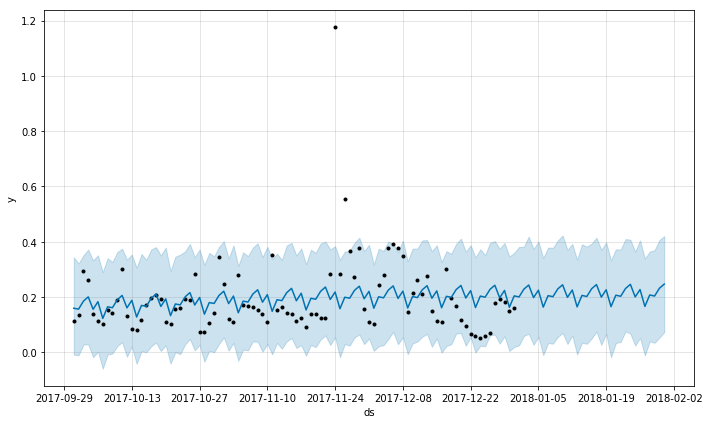

In [41]:
m.plot(forecast)

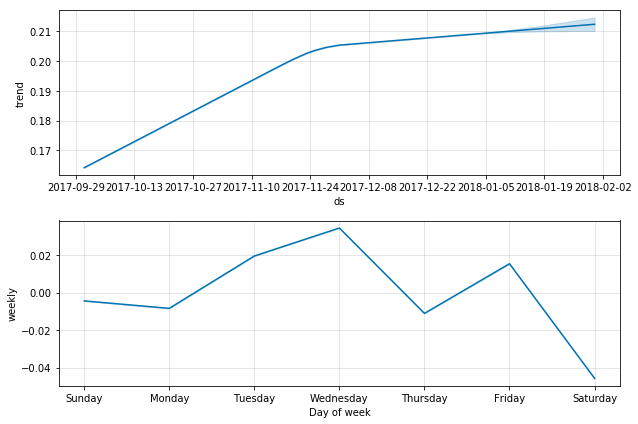

In [42]:
m.plot_components(forecast)